#### PageRank

PageRank:
{0: 0.353616058371943, 1: 0.1521134292489269, 2: 0.1521134292489269, 3: 0.1521134292489269, 4: 0.09502182694063807, 5: 0.09502182694063807}

Transition Matrix (column-stochastic form, directly computed):
[[0.   1.   1.   0.33 0.17 0.17]
 [0.33 0.   0.   0.   0.17 0.17]
 [0.33 0.   0.   0.   0.17 0.17]
 [0.33 0.   0.   0.   0.17 0.17]
 [0.   0.   0.   0.33 0.17 0.17]
 [0.   0.   0.   0.33 0.17 0.17]]


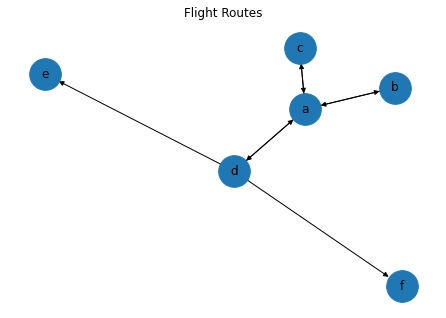

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Define the adjacency matrix (already column-oriented by transposing)
A = np.array([
    [0, 1, 1, 1, 0, 0],
    [1, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 1, 1],
    [0, 0, 0, 0, 0, 0],  # Dangling node
    [0, 0, 0, 0, 0, 0]   # Dangling node
])  

# Create directed graph from transposed A
G = nx.from_numpy_array(A, create_using=nx.DiGraph)

# Draw the graph
labels = {i: chr(97 + i) for i in range(len(A))}  # 'a', 'b', ...
nx.draw(G, labels=labels, with_labels=True, node_size=1000, arrows=True)
plt.title("Flight Routes")

# Print PageRank
print("PageRank:")
print(nx.pagerank(G))

# Compute transition matrix (# From now on, work on the transpose of A)
N = A.T.shape[1] # Number of columns
T = A.T.astype(float)
col_sums = T.sum(axis=0)

# Handle dangling nodes and normalise
for i in range(N):
    if col_sums[i] == 0:
        T[:,i] = np.ones(N) / N
    else:
        T[:,i] /= col_sums[i]

print("\nTransition Matrix (column-stochastic form, directly computed):")
print(np.round(T, 2))

plt.show()
